In [1]:
import numpy as np
from matplotlib import pyplot as plt, animation as animation, ticker as mticker
# from mpl_toolkits.mplot3d import Axes3D
from tqdm.notebook import tqdm
# %matplotlib widget

from fireworks.particles import Particles
import fireworks.ic as ic
import fireworks.nbodylib.dynamics as fnd
import fireworks.nbodylib.integrators as fni
np.random.seed(9725)

In [2]:
N=10
particles = ic.ic_random_normal(N=N)
particles.pos = particles.pos - particles.com_pos() 
particles.vel = particles.vel - particles.com_vel()

particles.pos = particles.pos * (-0.5/particles.Epot())
particles.vel = particles.vel * (0.25/particles.Ekin())

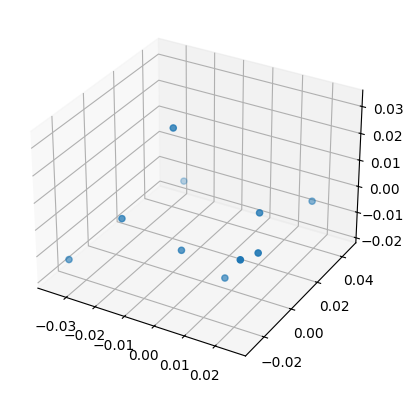

In [3]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(particles.pos[:, 0], particles.pos[:, 1], particles.pos[:, 2])

In [4]:
pos_list=[]
vel_list=[]
energy_list=[]

tdyn = np.std(np.linalg.norm(particles.vel, axis=1))/np.max(np.linalg.norm(particles.pos, axis=1))
tevolve=10*tdyn
tstep = 0.0001
tcurrent=0
tintermediate = np.linspace(0, tevolve, int(tevolve/tstep))
for t in tqdm(tintermediate):
    tstep=t-tcurrent
    if tstep <=0: continue # continue means go to the next step (i.e. next t in the array)
    # particles, efftime,_,_,_= fni.integrator_hermite(particles,tstep, acceleration_estimator=fnd.acceleration_direct_vectorized, args={'return_jerk':True})
    particles, efftime,_,_,_= fni.integrator_tsunami(particles,tstep)
    
    # Save the particles positions and velocities and energy
    pos_list.append(particles.pos.copy())
    vel_list.append(particles.vel.copy())
    Etot, _, _ = particles.Etot()
    energy_list.append(Etot)
    # Here we can save stuff, plot stuff, etc.
    tcurrent=tcurrent+efftime


  0%|          | 0/29510 [00:00<?, ?it/s]

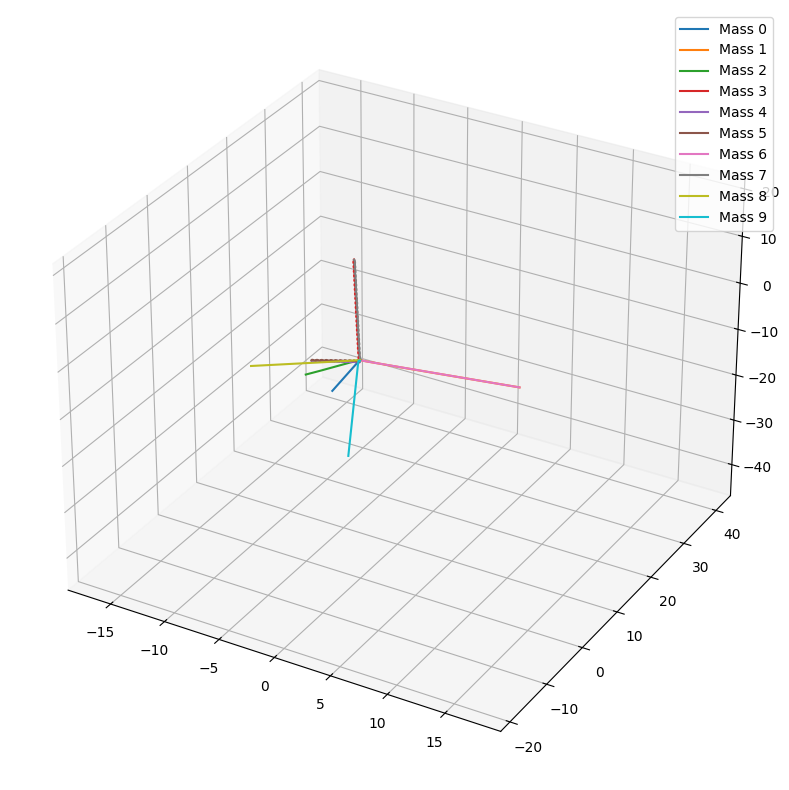

In [5]:
pos_array = np.array(pos_list)
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')
for i in range(N):
    x, y, z = pos_array[:, i][:, 0], pos_array[:, i][:, 1], pos_array[:, i][:, 2]
    ax.plot(x, y, z, label=f'Mass {i}')
    ax.legend()

In [ ]:
# downsampling
m = 1
#title
title = 'N body'

pos_array = pos_array[::m]
# data_pos_1 = pos_1[::m]
# data_pos_2 = pos_2[::m]
# lim_inf_x, lim_inf_y = np.minimum(pos_1[:, 0], pos_2[:, 0]).min(), np.minimum(pos_1[:, 1], pos_2[:, 1]).min()
# lim_sup_x, lim_sup_y = np.maximum(pos_1[:, 0], pos_2[:, 0]).max(), np.maximum(pos_1[:, 1], pos_2[:, 1]).max()

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')
plt.rcParams['font.size'] = '16'
plt.rcParams['lines.linewidth'] = '4'
plt.rcParams['axes.titlesize'] = '20'
plt.rcParams['axes.titlepad'] = '17'
plt.rcParams['axes.labelsize'] = '24'
plt.rcParams['legend.fontsize'] = '20'
plt.rcParams['axes.labelpad'] = '12'
plt.rcParams['axes.titleweight'] = '600'
plt.rcParams['axes.labelweight'] = '500'
plt.rcParams['xtick.labelsize'] = '20'
plt.rcParams['ytick.labelsize'] = '20'
plt.rcParams['xtick.major.size'] = '10'
plt.rcParams['ytick.major.size'] = '10'
plt.rcParams['ytick.minor.size'] = '4'

# Calculate the number of extra frames to add at the beginning and the end
pause_duration = 5  # pause duration in seconds start
pause_duration_end = 1  # pause duration in seconds end
frame_rate = 15  # frame rate of the animation
extra_frames = pause_duration * frame_rate
extra_frames_end = pause_duration_end * frame_rate

# Create an array of frame indices
frames = np.concatenate([
    np.full(int(extra_frames), 0),  # initial frame (pause
    np.arange(0, len(pos_array[:])-1, 5),  # original frames
    np.full(int(extra_frames_end), len(pos_array[:])-2)  # extra frames at the end
])

def update_pos(frame): 

    ax.clear()

    # for each frame, update the data stored on each artist.
    # x1 = data_pos_1[:frame, 0]
    # x2 = data_pos_2[:frame, 0]
    # y1 = data_pos_1[:frame, 1]
    # y2 = data_pos_2[:frame, 1]
    for i in range(N):
        x, y, z = pos_array[:frame, i][:, 0], pos_array[:frame, i][:, 1], pos_array[:frame, i][:, 2]
        ax.plot(x, y, z, label=f'Mass {i}')
        ax.legend()


    # ax.scatter(intr[0,0, 0], intr[0,0, 1], color="tab:red", s=100, marker="x", zorder=10, label="Initial Position")
    # ax.scatter(intr[0,1, 0], intr[0,1,1], color="tab:red", s=100, marker="x", zorder=10)
    # ax.scatter(intr[0,2,0], intr[0,2,1], color="tab:red", s=100, marker="x", zorder=10)
    
    # ax.plot(x1, y1, color="tab:blue", label="Body 1", alpha=0.8)
    # ax.plot(x2, y2, color="tab:orange", label="Body 2", alpha=0.8)

    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()

    # ax.set_xlim(np.min(intr[:, 2])-0.5, np.max(intr[:, 2])+0.5)
    # ax.set_ylim(np.min(intr[:, 3])-0.5, np.max(intr[:, 3])+0.5)

    # ax.set_xlim(lim_inf_x-2, lim_sup_x+2)
    # ax.set_ylim(lim_inf_y-2, lim_sup_y+2)
    
    fig.suptitle('Position on X-Y Plane', 
                 fontsize=24, fontweight='600')
print("Starting Position Animation")

gif_pos = animation.FuncAnimation(fig=fig, func=update_pos, frames=frames, interval=10)

gif_pos.save("./10_bodies_test.gif", writer="pillow")

print("Position Animation Saved")


Starting Position Animation
